In [1]:
from PIL import Image
import skimage
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import re # balik pro regularni vyrazy
from tabulate import tabulate
import matplotlib.pyplot as plt

In [2]:
def Intersection_Over_Union (mask_result, mask_true):
    intersection=np.sum((mask_result+mask_true)==2)
    union=(np.sum((mask_result+mask_true)==1) + np.sum((mask_result+mask_true)==2))
    if intersection==0 and union==0:
        IoU=1
    else:
        IoU = np.sum((mask_result+mask_true)==2) /  (np.sum((mask_result+mask_true)==1) + np.sum((mask_result+mask_true)==2) )
    return IoU

In [3]:
def IoUOnData(cesta_exp,cesta_GT,wright ,IoU_Name):
    #cesta_exp=Path(r"D:\Experimenty\24000Iter_0.001Uceni\vis_predictions_mask\2")
    #cesta_exp=Path(r"D:\Experimenty\Masky\Ucitel\Testovani\LeftKindeyOmezeni")
    #cesta_GT=Path(r"D:\Experimenty\Masky\Ucitel\Testovani\LiverOmezeni")
    seznam_GT=list(cesta_GT.glob("*.PNG"))
    summa_IoU=0
    for filenameGt in seznam_GT:
        cislo=filenameGt.stem[-9:-4]
        jmeno=filenameGt.stem[10:15]
        filename_exp=cesta_exp /f"{jmeno}D_Vensoubor_{cislo}.jpg"
        Existance_True=filename_exp.exists()
        img_gt=skimage.io.imread(filenameGt, as_gray=True)
        je_li_v_img_gt_organ=(np.sum(img_gt))
        if Existance_True:
            img_exp=skimage.io.imread(filename_exp, as_gray=True)
            arr_img_exp = (np.array(img_exp)>128).astype(np.uint8)
            #print(img_gt)
            IoU=Intersection_Over_Union (img_gt, arr_img_exp)
            summa_IoU=summa_IoU+IoU
            #print(filenameGt)
        elif je_li_v_img_gt_organ==0:
            #print(filenameGt)

            summa_IoU=summa_IoU+1   
    Count_Of_2d_Images=len(seznam_GT)

    IoU_finall=summa_IoU/Count_Of_2d_Images
    
    #print(IoU_finall)
    wright[IoU_Name]=IoU_finall

In [ ]:
wright={}
cesta_pred=[]
cesta_teacher=[]
cesta_teacher.append(Path(r"D:\Experimenty\Masky\Ucitel\Testovani\Left Kidney"))
cesta_teacher.append(Path(r"D:\Experimenty\Masky\Ucitel\Testovani\Liver"))
cesta_teacher.append(Path(r"D:\Experimenty\Masky\Ucitel\Testovani\Right Kidney"))

cesta_pred.append(Path(r"D:\Experimenty\300Iter_0.00001Uceni\vis_predictions_mask\0"))
cesta_pred.append(Path(r"D:\Experimenty\300Iter_0.00001Uceni\vis_predictions_mask\1"))
cesta_pred.append(Path(r"D:\Experimenty\300Iter_0.00001Uceni\vis_predictions_mask\2"))
cesta_pred.append(Path(r"D:\Experimenty\300Iter_0.0001Uceni\vis_predictions_mask\0"))
cesta_pred.append(Path(r"D:\Experimenty\300Iter_0.0001Uceni\vis_predictions_mask\1"))
cesta_pred.append(Path(r"D:\Experimenty\300Iter_0.0001Uceni\vis_predictions_mask\2"))
cesta_pred.append(Path(r"D:\Experimenty\300Iter_0.001Uceni\vis_predictions_mask\0"))
cesta_pred.append(Path(r"D:\Experimenty\300Iter_0.001Uceni\vis_predictions_mask\1"))
cesta_pred.append(Path(r"D:\Experimenty\300Iter_0.001Uceni\vis_predictions_mask\2"))
cesta_pred.append(Path(r"D:\Experimenty\300Iter_0.01Uceni\vis_predictions_mask\0"))
cesta_pred.append(Path(r"D:\Experimenty\300Iter_0.01Uceni\vis_predictions_mask\1"))
cesta_pred.append(Path(r"D:\Experimenty\300Iter_0.01Uceni\vis_predictions_mask\2"))
cesta_pred.append(Path(r"D:\Experimenty\900Iter_0.00001Uceni\vis_predictions_mask\0"))
cesta_pred.append(Path(r"D:\Experimenty\900Iter_0.00001Uceni\vis_predictions_mask\1"))
cesta_pred.append(Path(r"D:\Experimenty\900Iter_0.00001Uceni\vis_predictions_mask\2"))
cesta_pred.append(Path(r"D:\Experimenty\900Iter_0.0001Uceni\vis_predictions_mask\0"))
cesta_pred.append(Path(r"D:\Experimenty\900Iter_0.0001Uceni\vis_predictions_mask\1"))
cesta_pred.append(Path(r"D:\Experimenty\900Iter_0.0001Uceni\vis_predictions_mask\2"))
cesta_pred.append(Path(r"D:\Experimenty\900Iter_0.001Uceni\vis_predictions_mask\0"))
cesta_pred.append(Path(r"D:\Experimenty\900Iter_0.001Uceni\vis_predictions_mask\1"))
cesta_pred.append(Path(r"D:\Experimenty\900Iter_0.001Uceni\vis_predictions_mask\2"))
cesta_pred.append(Path(r"D:\Experimenty\900Iter_0.01Uceni\vis_predictions_mask\0"))
cesta_pred.append(Path(r"D:\Experimenty\900Iter_0.01Uceni\vis_predictions_mask\1"))
cesta_pred.append(Path(r"D:\Experimenty\900Iter_0.01Uceni\vis_predictions_mask\2"))
cesta_pred.append(Path(r"D:\Experimenty\1500Iter_0.00001Uceni\vis_predictions_mask\0"))
cesta_pred.append(Path(r"D:\Experimenty\1500Iter_0.00001Uceni\vis_predictions_mask\1"))
cesta_pred.append(Path(r"D:\Experimenty\1500Iter_0.00001Uceni\vis_predictions_mask\2"))
cesta_pred.append(Path(r"D:\Experimenty\1500Iter_0.0001Uceni\vis_predictions_mask\0"))
cesta_pred.append(Path(r"D:\Experimenty\1500Iter_0.0001Uceni\vis_predictions_mask\1"))
cesta_pred.append(Path(r"D:\Experimenty\1500Iter_0.0001Uceni\vis_predictions_mask\2"))
cesta_pred.append(Path(r"D:\Experimenty\1500Iter_0.001Uceni\vis_predictions_mask\0"))
cesta_pred.append(Path(r"D:\Experimenty\1500Iter_0.001Uceni\vis_predictions_mask\1"))
cesta_pred.append(Path(r"D:\Experimenty\1500Iter_0.001Uceni\vis_predictions_mask\2"))
cesta_pred.append(Path(r"D:\Experimenty\1500Iter_0.01Uceni\vis_predictions_mask\0"))
cesta_pred.append(Path(r"D:\Experimenty\1500Iter_0.01Uceni\vis_predictions_mask\1"))
cesta_pred.append(Path(r"D:\Experimenty\1500Iter_0.01Uceni\vis_predictions_mask\2"))
cesta_pred.append(Path(r"D:\Experimenty\3000Iter_0.00001Uceni\vis_predictions_mask\0"))
cesta_pred.append(Path(r"D:\Experimenty\3000Iter_0.00001Uceni\vis_predictions_mask\1"))
cesta_pred.append(Path(r"D:\Experimenty\3000Iter_0.00001Uceni\vis_predictions_mask\2"))
cesta_pred.append(Path(r"D:\Experimenty\3000Iter_0.0001Uceni\vis_predictions_mask\0"))
cesta_pred.append(Path(r"D:\Experimenty\3000Iter_0.0001Uceni\vis_predictions_mask\1"))
cesta_pred.append(Path(r"D:\Experimenty\3000Iter_0.0001Uceni\vis_predictions_mask\2"))
cesta_pred.append(Path(r"D:\Experimenty\3000Iter_0.001Uceni\vis_predictions_mask\0"))
cesta_pred.append(Path(r"D:\Experimenty\3000Iter_0.001Uceni\vis_predictions_mask\1"))
cesta_pred.append(Path(r"D:\Experimenty\3000Iter_0.001Uceni\vis_predictions_mask\2"))
cesta_pred.append(Path(r"D:\Experimenty\3000Iter_0.01Uceni\vis_predictions_mask\0"))
cesta_pred.append(Path(r"D:\Experimenty\3000Iter_0.01Uceni\vis_predictions_mask\1"))
cesta_pred.append(Path(r"D:\Experimenty\3000Iter_0.01Uceni\vis_predictions_mask\2"))
cesta_pred.append(Path(r"D:\Experimenty\12000Iter_0.00001Uceni\vis_predictions_mask\0"))
cesta_pred.append(Path(r"D:\Experimenty\12000Iter_0.00001Uceni\vis_predictions_mask\1"))
cesta_pred.append(Path(r"D:\Experimenty\12000Iter_0.00001Uceni\vis_predictions_mask\2"))
cesta_pred.append(Path(r"D:\Experimenty\12000Iter_0.0001Uceni\vis_predictions_mask\0"))
cesta_pred.append(Path(r"D:\Experimenty\12000Iter_0.0001Uceni\vis_predictions_mask\1"))
cesta_pred.append(Path(r"D:\Experimenty\12000Iter_0.0001Uceni\vis_predictions_mask\2"))
cesta_pred.append(Path(r"D:\Experimenty\12000Iter_0.001Uceni\vis_predictions_mask\0"))
cesta_pred.append(Path(r"D:\Experimenty\12000Iter_0.001Uceni\vis_predictions_mask\1"))
cesta_pred.append(Path(r"D:\Experimenty\12000Iter_0.001Uceni\vis_predictions_mask\2"))
cesta_pred.append(Path(r"D:\Experimenty\24000Iter_0.001Uceni\vis_predictions_mask\0"))
cesta_pred.append(Path(r"D:\Experimenty\24000Iter_0.001Uceni\vis_predictions_mask\1"))
cesta_pred.append(Path(r"D:\Experimenty\24000Iter_0.001Uceni\vis_predictions_mask\2"))
cesta_pred.append(Path(r"D:\Experimenty\30000Iter_0.001Uceni\vis_predictions_mask\0"))
cesta_pred.append(Path(r"D:\Experimenty\30000Iter_0.001Uceni\vis_predictions_mask\1"))
cesta_pred.append(Path(r"D:\Experimenty\30000Iter_0.001Uceni\vis_predictions_mask\2"))
cesta_pred.append(Path(r"D:\Experimenty\40000Iter_0.001Uceni\vis_predictions_mask\0"))
cesta_pred.append(Path(r"D:\Experimenty\40000Iter_0.001Uceni\vis_predictions_mask\1"))
cesta_pred.append(Path(r"D:\Experimenty\40000Iter_0.001Uceni\vis_predictions_mask\2"))

In [4]:
wright={}
cesta_pred=[]
cesta_teacher=[]
cesta_teacher.append(Path(r"D:\Experimenty\Masky\Ucitel\Testovani\Left Kidney"))
cesta_teacher.append(Path(r"D:\Experimenty\Masky\Ucitel\Testovani\Liver"))
cesta_teacher.append(Path(r"D:\Experimenty\Masky\Ucitel\Testovani\Right Kidney"))


cesta_pred.append(Path(r"D:\Experimenty\30000Iter_0.001Uceni_3in1\vis_predictions_mask\0"))
cesta_pred.append(Path(r"D:\Experimenty\30000Iter_0.001Uceni_3in1\vis_predictions_mask\1"))
cesta_pred.append(Path(r"D:\Experimenty\30000Iter_0.001Uceni_3in1\vis_predictions_mask\2"))


for path_cesta in cesta_pred:
    path_cesta_organ_cislo=str(path_cesta.stem)
    if path_cesta_organ_cislo=="0":
        path_cesta_organ="Left Kidney"
    if path_cesta_organ_cislo=="1":
        path_cesta_organ="Right Kidney"
    if path_cesta_organ_cislo=="2":
        path_cesta_organ="Liver"
    for path_teacher in cesta_teacher:
        path_teacher_organ=str(path_teacher.stem)
        if path_teacher_organ==path_cesta_organ:
            
            Useable_teacher=path_teacher
            Useable_pred=path_cesta
            Pacient_and_iteration=str(Useable_pred.parents[1])[15:]
            Organ=Useable_teacher.stem
            
            Useable_pred_name=Pacient_and_iteration+"_"+Organ+": "
            IoUOnData(Useable_pred,Useable_teacher,wright, Useable_pred_name)
            print("ok")

ok
ok
ok


In [5]:
wright_data=[]
for i in wright:
    helper=[]
    helper.append(i)
    helper.append(wright[i])
    wright_data.append(helper)


TypeError: 'str' object cannot be interpreted as an integer

In [6]:
data=[]
nazev=[]
for i in wright_data:
    

    data.append(i[1])
    nazev.append(i[0])

In [7]:
fig = plt.figure()
ax = fig.add_axes([40,40,40,40])
ax.bar(nazev,data)

<BarContainer object of 3 artists>

In [7]:

col_names = ["Experiment","IoU"]
print(tabulate(wright_data, headers=col_names))


Experiment                                    IoU
---------------------------------------  --------
30000Iter_0.001Uceni_3in1_Left Kidney:   0.943924
30000Iter_0.001Uceni_3in1_Right Kidney:  0.825781
30000Iter_0.001Uceni_3in1_Liver:         0.682828


In [156]:
Liver_IoU={}
LeftKidney_IoU={}
RightKidney_IoU={}
for Name in wright_data:
    print(Name)
    Help1=Name[0].split("_")
    Organ=Help1[2][:-2]
    Iterace=Help1[0][:-4]
    Uceni=Help1[1][:-5]
    if Organ=="Liver":
        Liver_IoU[Iterace+" "+Uceni]=Name[1]
    if Organ=="Left Kidney":
        LeftKidney_IoU[Iterace+" "+Uceni]=Name[1]
    if Organ=="Right Kidney":
        RightKidney_IoU[Iterace+" "+Uceni]=Name[1]

['24000Iter_0.001Uceni_Left Kidney: ', 0.9267862882203097]
['24000Iter_0.001Uceni_Right Kidney: ', 0.8590273018756717]
['24000Iter_0.001Uceni_Liver: ', 0.596468796407745]
['30000Iter_0.001Uceni_Left Kidney: ', 0.9584773359399724]
['30000Iter_0.001Uceni_Right Kidney: ', 0.885161013416092]
['30000Iter_0.001Uceni_Liver: ', 0.6992374560008391]
['40000Iter_0.001Uceni_Left Kidney: ', 0.9040753933048756]
['40000Iter_0.001Uceni_Right Kidney: ', 0.8222896745554962]
['40000Iter_0.001Uceni_Liver: ', 0.739991513397143]


In [157]:
#Pro 3in1
Liver_IoU={}
LeftKidney_IoU={}
RightKidney_IoU={}
for Name in wright_data:
    print(Name)
    Help1=Name[0].split("_")
    Organ=Help1[2][:-2]
    Iterace=Help1[0][:-4]
    Uceni=Help1[1][:-5]
    if Organ=="Liver":
        Liver_IoU[Iterace+" "+Uceni]=Name[1]
    if Organ=="Left Kidney":
        LeftKidney_IoU[Iterace+" "+Uceni]=Name[1]
    if Organ=="Right Kidney":
        RightKidney_IoU[Iterace+" "+Uceni]=Name[1]

['24000Iter_0.001Uceni_Left Kidney: ', 0.9267862882203097]
['24000Iter_0.001Uceni_Right Kidney: ', 0.8590273018756717]
['24000Iter_0.001Uceni_Liver: ', 0.596468796407745]
['30000Iter_0.001Uceni_Left Kidney: ', 0.9584773359399724]
['30000Iter_0.001Uceni_Right Kidney: ', 0.885161013416092]
['30000Iter_0.001Uceni_Liver: ', 0.6992374560008391]
['40000Iter_0.001Uceni_Left Kidney: ', 0.9040753933048756]
['40000Iter_0.001Uceni_Right Kidney: ', 0.8222896745554962]
['40000Iter_0.001Uceni_Liver: ', 0.739991513397143]


In [158]:
Help1

['40000Iter', '0.001Uceni', 'Liver: ']

In [159]:
Liver_IoU

{'24000 0.001': 0.596468796407745,
 '30000 0.001': 0.6992374560008391,
 '40000 0.001': 0.739991513397143}

In [160]:
LeftKidney_IoU

{'24000 0.001': 0.9267862882203097,
 '30000 0.001': 0.9584773359399724,
 '40000 0.001': 0.9040753933048756}

In [ ]:
0,8222896745554962

In [161]:
RightKidney_IoU

{'24000 0.001': 0.8590273018756717,
 '30000 0.001': 0.885161013416092,
 '40000 0.001': 0.8222896745554962}

In [131]:
import pandas as pd

In [145]:
rows_name=["0.00001","0.0001","0.001","0.01"]
colum2=[300, 12000]
raw_0_01=[]
raw_0_001=[]
raw_0_0001=[]
raw_0_00001=[]
for i in RightKidney_IoU:
    #Table_2={}
    helper=i.split()
    print(helper)
    for a in rows_name:
        if a=="0.00001":
            if str(a)==helper[1]:
                addable=str(RightKidney_IoU[i])
                raw_0_00001.append(RightKidney_IoU[i])
        if a=="0.0001":
            if str(a)==helper[1]:
                addable=str(RightKidney_IoU[i])
                raw_0_0001.append(RightKidney_IoU[i])
        if a=="0.001":

            if str(a)==helper[1]:
                addable=str(RightKidney_IoU[i])
                raw_0_001.append(RightKidney_IoU[i])
        if a=="0.01":
           
            if str(a)==helper[1]:
                addable=str(RightKidney_IoU[i])
                
                raw_0_01.append(RightKidney_IoU[i])


['300', '0.00001']
['300', '0.0001']
['300', '0.001']
['300', '0.01']
['12000', '0.00001']
['12000', '0.0001']
['12000', '0.001']


In [146]:
raw_0_00001

[0.8565426170468188, 0.7939460724027113]

In [147]:
colum2=[300, 12000]

In [148]:
data = {"0.01":raw_0_01,"0.001":raw_0_001,"0.0001":raw_0_0001, "0.00001":raw_0_00001}
df=pd.DataFrame.from_dict(data, orient='index',columns=['300', "12000"])
df.name="RightKidney"

In [149]:
df.to_excel('./RightKidneyStandart.xlsx')

<AxesSubplot:>

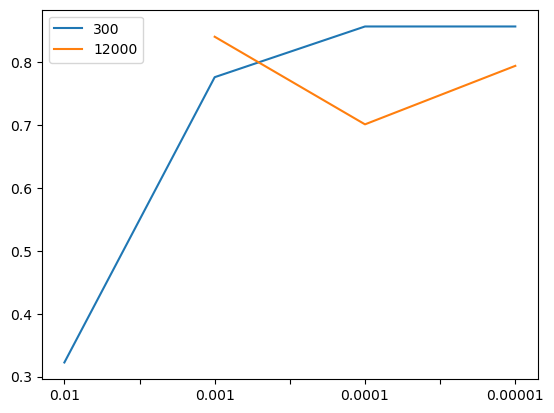

In [150]:
df.plot()